In [1]:
import sys
sys.path.append('.conda/envs/shear/lib/python3.9/site-packages/')

import numpy as np
import astropy.io.fits as pf
import pylab as mplot
import yaml
import h5py
import healpy as hp

%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
tag = '20240209'
nside = 4096
project_dir = '/project/chihway/data/decade/'
master_cat = project_dir+'metacal_gold_combined_'+tag+'.hdf'

In [3]:
with h5py.File(master_cat, 'r') as h5r:

    print(h5r.keys())

<KeysViewHDF5 ['Ag_planck13', 'Ag_sfd98', 'Ai_planck13', 'Ai_sfd98', 'Ar_planck13', 'Ar_sfd98', 'Az_planck13', 'Az_sfd98', 'BDF_FLUX_ERR_G', 'BDF_FLUX_ERR_G_DERED_PLANCK13', 'BDF_FLUX_ERR_G_DERED_SFD98', 'BDF_FLUX_ERR_I', 'BDF_FLUX_ERR_I_DERED_PLANCK13', 'BDF_FLUX_ERR_I_DERED_SFD98', 'BDF_FLUX_ERR_R', 'BDF_FLUX_ERR_R_DERED_PLANCK13', 'BDF_FLUX_ERR_R_DERED_SFD98', 'BDF_FLUX_ERR_Z', 'BDF_FLUX_ERR_Z_DERED_PLANCK13', 'BDF_FLUX_ERR_Z_DERED_SFD98', 'BDF_FLUX_G', 'BDF_FLUX_G_DERED_PLANCK13', 'BDF_FLUX_G_DERED_SFD98', 'BDF_FLUX_I', 'BDF_FLUX_I_DERED_PLANCK13', 'BDF_FLUX_I_DERED_SFD98', 'BDF_FLUX_R', 'BDF_FLUX_R_DERED_PLANCK13', 'BDF_FLUX_R_DERED_SFD98', 'BDF_FLUX_Z', 'BDF_FLUX_Z_DERED_PLANCK13', 'BDF_FLUX_Z_DERED_SFD98', 'BDF_S2N', 'BDF_T', 'COADD_OBJECT_ID', 'DEC', 'FLAGS_BAD_COLOR', 'FLAGS_FOOTPRINT', 'FLAGS_FOREGROUND', 'FLAGS_SG_BDF', 'FLUXERR_AUTO_G', 'FLUXERR_AUTO_G_DERED_PLANCK13', 'FLUXERR_AUTO_G_DERED_SFD98', 'FLUXERR_AUTO_I', 'FLUXERR_AUTO_I_DERED_PLANCK13', 'FLUXERR_AUTO_I_DERED_SFD

In [14]:
with h5py.File(master_cat, 'r') as h5r:
    ra = h5r['RA'][:]
    dec = h5r['DEC'][:]
    flags_fg = h5r['FLAGS_FOREGROUND'][:]
    flags_ft = h5r['FLAGS_FOOTPRINT'][:]
    flags_bc = h5r['FLAGS_BAD_COLOR'][:]

In [15]:
len(ra[flags_fg==0])/len(ra)

0.7072273421606874

In [16]:
len(ra[(flags_fg==0)*(flags_ft==0)*(flags_bc==0)])/len(ra[flags_fg==0])

0.9916958361104934

In [17]:
len(ra[(flags_fg==0)*(flags_ft==0)*(flags_bc==0)])

470812637

In [18]:
mask = (flags_fg==0)*(flags_ft==0)*(flags_bc==0)
ra = ra[mask]
dec = dec[mask]

nside = 4096
map_counts = np.zeros(hp.nside2npix(nside))

phi = ra/180*np.pi
theta = (90.-dec)/180*np.pi

pix = hp.ang2pix(nside, theta, phi)

In [19]:
unique_pix, idx_rep = np.unique(pix, return_inverse=True)
map_counts[unique_pix] += np.bincount(idx_rep)

In [20]:
area = len(map_counts[map_counts>0])/len(map_counts)*4*np.pi*(180./np.pi)**2*60*60
print('area', area/60/60, 'deg^2')

area 5750.200956186278 deg^2


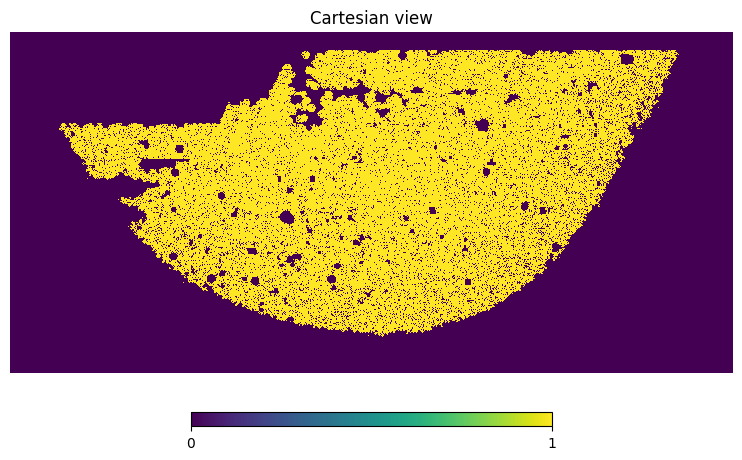

In [23]:
hp.cartview(map_counts, rot=[180,0], lonra=[-90,90], latra=[-50,35], min=0, max=1)

### Get selection masks

In [ ]:
with h5py.File(master_cat, 'r') as f:
    mask_noshear = f['baseline_mcal_mask_noshear'][:]
    mask_1p = f['baseline_mcal_mask_1p'][:]
    mask_1m = f['baseline_mcal_mask_1m'][:]
    mask_2p = f['baseline_mcal_mask_2p'][:]
    mask_2m = f['baseline_mcal_mask_2m'][:]

In [ ]:
for i in range(4):
    print('bin'+str(i+1))
    print(len(mask_noshear[mask_noshear==i+1]), len(mask_1p[mask_1p==i+1]), len(mask_1m[mask_1m==i+1]), len(mask_2p[mask_2p==i+1]), len(mask_2m[mask_2m==i+1]))

In [6]:
print(len(mask_noshear))

print('tomographic')
print('no shear', len(mask_noshear[mask_noshear==0]), len(mask_noshear[mask_noshear==1]), len(mask_noshear[mask_noshear==2]), len(mask_noshear[mask_noshear==3]), len(mask_noshear[mask_noshear==4]))
print('1p', len(mask_1p[mask_1p==0]), len(mask_1p[mask_1p==1]), len(mask_1p[mask_1p==2]), len(mask_1p[mask_1p==3]), len(mask_1p[mask_1p==4]))
print('1m', len(mask_1m[mask_1m==0]), len(mask_1m[mask_1m==1]), len(mask_1m[mask_1m==2]), len(mask_1m[mask_1m==3]), len(mask_1m[mask_1m==4]))
print('2p', len(mask_2p[mask_2p==0]), len(mask_2p[mask_2p==1]), len(mask_2p[mask_2p==2]), len(mask_2p[mask_2p==3]), len(mask_2p[mask_2p==4]))
print('2m', len(mask_2m[mask_2m==0]), len(mask_2m[mask_2m==1]), len(mask_2m[mask_2m==2]), len(mask_2m[mask_2m==3]), len(mask_2m[mask_2m==4]))

print('non-tomographic')
print('no shear', len(mask_noshear[mask_noshear>0]))
print('1p', len(mask_1p[mask_1p>0]))
print('1m', len(mask_1m[mask_1m>0]))
print('2p', len(mask_2p[mask_2p>0]))
print('2m', len(mask_2m[mask_2m>0]))


677650794
tomographic
no shear 568746125 27206483 27207069 27140698 27350419
1p 568737409 27205545 27210185 27237136 27260519
1m 568738848 27207439 27206586 27235322 27262599
2p 568740420 27205988 27209594 27236641 27258151
2m 568735683 27208261 27208758 27239134 27258958
non-tomographic
no shear 108904669
1p 108913385
1m 108911946
2p 108910374
2m 108915111


### Get responses

In [7]:
def weight_average(values, weights):
    return np.sum(values*weights)/np.sum(weights)

In [ ]:
# take this out of the with
with h5py.File(master_cat, 'r') as h5r:
    g_noshear = h5r['mcal_g_noshear'][:]
    g_1p = h5r['mcal_g_1p'][:]
    g_1m = h5r['mcal_g_1m'][:]
    g_2p = h5r['mcal_g_2p'][:]
    g_2m = h5r['mcal_g_2m'][:]
    w = h5r['mcal_g_w'][:]

In [ ]:
dgamma = 2*0.01

R_11 = []
R_11s = []
R_22 = []
R_22s = []
  

for i in range(4):
    print('bin'+str(i))
    
    mask_noshear_bin = (mask_noshear==i+1)
    mask_1p_bin = (mask_1p==i+1)
    mask_1m_bin = (mask_1m==i+1)
    mask_2p_bin = (mask_2p==i+1)
    mask_2m_bin = (mask_2m==i+1)
    
    R11 =  (weight_average(g_1p[:,0][mask_noshear_bin],w[mask_noshear_bin]) - weight_average(g_1m[:,0][mask_noshear_bin], w[mask_noshear_bin]))/dgamma
    R11s = (weight_average(g_noshear[:,0][mask_1p_bin], w[mask_1p_bin]) - weight_average(g_noshear[:,0][mask_1m_bin], w[mask_1m_bin]))/dgamma
    R22 =  (weight_average(g_2p[:,1][mask_noshear_bin], w[mask_noshear_bin]) - weight_average(g_2m[:,1][mask_noshear_bin], w[mask_noshear_bin]))/dgamma
    R22s = (weight_average(g_noshear[:,1][mask_2p_bin], w[mask_2p_bin]) - weight_average(g_noshear[:,1][mask_2m_bin], w[mask_2m_bin]))/dgamma
    R11tot = R11+R11s
    R22tot = R22+R22s
    
    print('R11', R11, 'R11s', R11s)
    print('R22', R22, 'R22s', R22s)
    print('R11tot', R11tot, 'R22tot', R22tot)

    R_11.append(R11)
    R_11s.append(R11s)
    R_22.append(R22)
    R_22s.append(R22s)


print("non-tomographic")

mask_noshear_bin = (mask_noshear>0)
mask_1p_bin = (mask_1p>0)
mask_1m_bin = (mask_1m>0)
mask_2p_bin = (mask_2p>0)
mask_2m_bin = (mask_2m>0)

R11 =  (weight_average(g_1p[:,0][mask_noshear_bin],w[mask_noshear_bin]) - weight_average(g_1m[:,0][mask_noshear_bin], w[mask_noshear_bin]))/dgamma
R11s = (weight_average(g_noshear[:,0][mask_1p_bin], w[mask_1p_bin]) - weight_average(g_noshear[:,0][mask_1m_bin], w[mask_1m_bin]))/dgamma
R22 =  (weight_average(g_2p[:,1][mask_noshear_bin], w[mask_noshear_bin]) - weight_average(g_2m[:,1][mask_noshear_bin], w[mask_noshear_bin]))/dgamma
R22s = (weight_average(g_noshear[:,1][mask_2p_bin], w[mask_2p_bin]) - weight_average(g_noshear[:,1][mask_2m_bin], w[mask_2m_bin]))/dgamma
R11tot = R11+R11s
R22tot = R22+R22s

print('R11', R11, 'R11s', R11s)
print('R22', R22, 'R22s', R22s)
print('R11tot', R11tot, 'R22tot', R22tot)

R_11.append(R11)
R_11s.append(R11s)
R_22.append(R22)
R_22s.append(R22s)

In [ ]:
del g_noshear, g_1p, g_1m, g_2p, g_2m

### Get area

In [4]:
with h5py.File(master_cat, 'r') as h5r:
    ra = h5r['RA'][:]
    dec = h5r['DEC'][:]
    g1, g2  = h5r['mcal_g_noshear'][:].T
    w = h5r['mcal_g_w'][:]

In [5]:
mask_noshear_nontomo = (mask_noshear>0)
ra = ra[mask_noshear_nontomo]
dec = dec[mask_noshear_nontomo]
g1 = g1[mask_noshear_nontomo]
g2 = g2[mask_noshear_nontomo]
w = w[mask_noshear_nontomo]

In [6]:
nside = 4096
map_counts = np.zeros(hp.nside2npix(nside))

phi = ra/180*np.pi
theta = (90.-dec)/180*np.pi

pix = hp.ang2pix(nside, theta, phi)

In [7]:
unique_pix, idx_rep = np.unique(pix, return_inverse=True)
map_counts[unique_pix] += np.bincount(idx_rep)

In [8]:
area = len(map_counts[map_counts>0])/len(map_counts)*4*np.pi*(180./np.pi)**2*60*60
print('area', area/60/60, 'deg^2')

area 5460.137711948227 deg^2


In [9]:
# raw number
print(len(ra)/area)
n = len(ra)/area

del ra, dec, g1, g2, w, pix, theta, phi

5.540390836342204


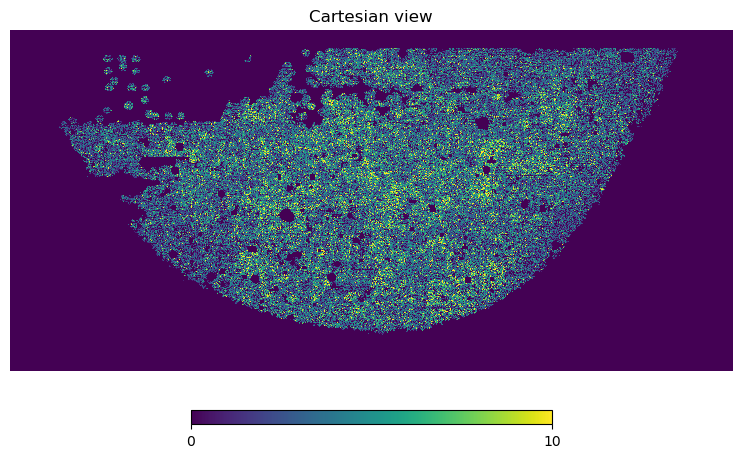

In [10]:
hp.cartview(map_counts, rot=[180,0], lonra=[-90,90], latra=[-50,35], min=0, max=10)

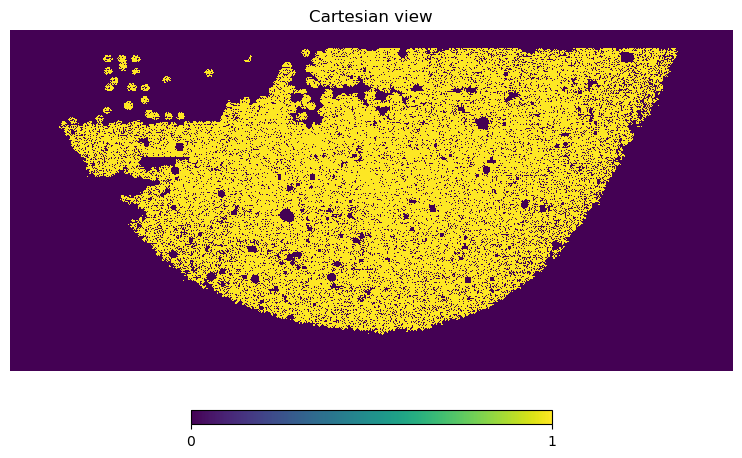

In [11]:
mask_all = map_counts.copy()
mask_all[mask_all>0] = 1
hp.cartview(mask_all, rot=[180,0], lonra=[-90,90], latra=[-50,35])

In [12]:
hp.write_map(project_dir+'footprint_mask_delve_cs_2023'+tag+'.fits', mask_all, dtype=int, overwrite=True)

### H12 neff and sigmae

In [13]:
def neff_H12(w, A):
    return 1./A * (np.sum(w)**2) / (np.sum(w**2))

def sigmae2_H12(w, g1, R1, g2, R2, neff, A):
    return np.sqrt(0.5*((np.sum(w**2*(g1/R1)**2)/(np.sum(w))**2)
                        +(np.sum(w**2*(g2/R2)**2)/(np.sum(w))**2))*(A*neff))


### C13 neff and sigmae

In [14]:
# should double check this...
def sigmae2_C13(w, g1, R1, g2, R2, sigma2_e1_m, sigma2_e2_m):
    return np.sqrt(0.5* np.sum(w**2*((g1/R1)**2+(g2/R2)**2 
                                     - sigma2_e1_m/R1**2 - sigma2_e2_m/R2**2)) / np.sum(w**2))


def neff_C13(w, g1, R1, g2, R2, sigma2_e1_m, sigma2_e2_m, A):
    return (1./A * (np.sum(w)**2) / (np.sum(w**2))
    *(np.sum(w**2*((g1/R1)**2+(g2/R2)**2 - sigma2_e1_m/R1**2 - sigma2_e2_m/R2**2)))
    / np.sum(w**2*((g1/R1)**2+(g2/R2)**2)))


In [15]:
with h5py.File(project_dir+'metacal_gold_combined_2023'+tag+'.hdf', 'r') as h5r:
    mcal_g_cov = h5r['mcal_g_cov_noshear'][:]
    g1, g2  = h5r['mcal_g_noshear'][:].T
    w = h5r['mcal_g_w'][:]

In [16]:
# tomographic

Neff_H12 = []
Sigmae_H12 = []
Neff_C13 = []
Sigmae_C13 = []
N = []

for i in range(4):
    
    mask_noshear_bin = (mask_noshear==i+1)
    
    mcal_g_cov_bin = mcal_g_cov[mask_noshear_bin]
    g1_bin = g1[mask_noshear_bin]
    g2_bin = g2[mask_noshear_bin]
    w_bin = w[mask_noshear_bin]
    
    sigma2_e1_m = mcal_g_cov_bin[:,0,0] 
    sigma2_e2_m = mcal_g_cov_bin[:,1,1]

    R11tot = R_11[i]+R_11s[i]
    R22tot = R_22[i]+R_22s[i]
    
    neff_H12_bin = neff_H12(w_bin, area)
    sigmae_H12_bin = sigmae2_H12(w_bin, g1_bin, R11tot, g2_bin, R22tot, neff_H12_bin, area)
    
    sigmae_C13_bin = sigmae2_C13(w_bin, g1_bin, R11tot, g2_bin, R22tot, sigma2_e1_m, sigma2_e2_m)
    neff_C13_bin = neff_C13(w_bin, g1_bin, R11tot, g2_bin, R22tot, sigma2_e1_m, sigma2_e2_m, area)
    
    print("bin"+str(i), neff_H12_bin, sigmae_H12_bin, neff_C13_bin, sigmae_C13_bin)

    Neff_H12.append(neff_H12_bin)
    Neff_C13.append(neff_C13_bin)
    Sigmae_H12.append(sigmae_H12_bin)
    Sigmae_C13.append(sigmae_C13_bin)
    N.append(len(w_bin)/area/60/60)
    


NameError: name 'R_11' is not defined

In [ ]:
# non-tomographic

mask_noshear_bin = (mask_noshear>0)

mcal_g_cov_bin = mcal_g_cov[mask_noshear_bin]
g1_bin = g1[mask_noshear_bin]
g2_bin = g2[mask_noshear_bin]
w_bin = w[mask_noshear_bin]

sigma2_e1_m = mcal_g_cov_bin[:,0,0] 
sigma2_e2_m = mcal_g_cov_bin[:,1,1]

R11tot = R_11[4]+R_11s[4]
R22tot = R_22[4]+R_22s[4]

neff_H12_bin = neff_H12(w_bin, area)
sigmae_H12_bin = sigmae2_H12(w_bin, g1_bin, R11tot, g2_bin, R22tot, neff_H12_bin, area)

sigmae_C13_bin = sigmae2_C13(w_bin, g1_bin, R11tot, g2_bin, R22tot, sigma2_e1_m, sigma2_e2_m)
neff_C13_bin = neff_C13(w_bin, g1_bin, R11tot, g2_bin, R22tot, sigma2_e1_m, sigma2_e2_m, area)

print("non-tomo", neff_H12_bin, sigmae_H12_bin, neff_C13_bin, sigmae_C13_bin)

Neff_H12.append(neff_H12_bin)
Neff_C13.append(neff_C13_bin)
Sigmae_H12.append(sigmae_H12_bin)
Sigmae_C13.append(sigmae_C13_bin)
N.append(len(w_bin)/area/60/60)


In [50]:
# neff_H12 = neff_H12(w, area)
# sigmae_H12 = sigmae2_H12(w, g1, R11tot, g2, R22tot, neff_H12, area)

# sigmae_C13 = sigmae2_C13(w, g1, R11tot, g2, R22tot, sigma2_e1_m, sigma2_e2_m)
# neff_C13 = neff_C13(w, g1, R11tot, g2, R22tot, sigma2_e1_m, sigma2_e2_m, area)


### Print all results for table 2

In [58]:
for i in range(5):
    print("%.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f & %.3f " 
          % (N[i]*60*60, R_11[i], R_11s[i], R_11[i]+R_11s[i], R_22[i], R_22s[i], R_22[i]+R_22s[i], Neff_C13[i], Sigmae_C13[i], Neff_H12[i], Sigmae_H12[i]))


1.384 & 0.842 & 0.017 & 0.859 & 0.843 & 0.017 & 0.860 & 1.254 & 0.249 & 1.265 & 0.251 
1.384 & 0.785 & 0.033 & 0.817 & 0.786 & 0.033 & 0.819 & 1.226 & 0.275 & 1.241 & 0.277 
1.381 & 0.729 & 0.032 & 0.761 & 0.730 & 0.031 & 0.761 & 1.196 & 0.267 & 1.225 & 0.270 
1.391 & 0.602 & 0.023 & 0.624 & 0.602 & 0.022 & 0.624 & 1.102 & 0.324 & 1.165 & 0.333 
5.540 & 0.754 & 0.026 & 0.780 & 0.755 & 0.026 & 0.781 & 4.710 & 0.273 & 4.803 & 0.276 


### Make one map first to confirm I have not screwed up the matching totally

In [7]:
with h5py.File(project_dir+'metacal_gold_combined_2023'+tag+'.hdf', 'r') as f:
    ra = f['RA'][:]
    dec = f['DEC'][:]
    Tr = f['mcal_psf_T_noshear'][:]


In [8]:
## downsample to 1M objects

# Ntotal = len(ra[mask_noshear])
# ids = np.arange(Ntotal)
# np.random.shuffle(ids)
ra = ra[mask_noshear] #[ids[:1000000]]
dec = dec[mask_noshear] #[ids[:1000000]]
Tr = Tr[mask_noshear] #[ids[:1000000]]

In [9]:
theta = (90.-dec)/180*np.pi
phi = ra/180*np.pi
pix = hp.ang2pix(nside, theta, phi)

In [10]:
Tr_map = np.zeros(hp.nside2npix(nside))
Count_map = np.zeros(hp.nside2npix(nside))

for i in range(len(ra)):
    Tr_map[pix[i]] += Tr[i]
    Count_map[pix[i]] += 1

In [11]:
Tr_map[Count_map!=0] /= Count_map[Count_map!=0]

In [24]:
# hp.cartview?

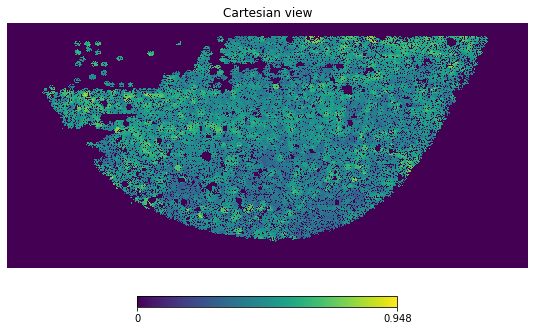

In [23]:
hp.cartview(Tr_map, rot=[180,0], lonra=[-90,90], latra=[-50,35])